<a href="https://colab.research.google.com/github/ta1231/ML_Practice/blob/main/BostonHousing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
BostonHousingData = pd.read_csv("/content/BostonHousingData.csv", encoding='utf-8')
features=BostonHousingData.iloc[:, 0:14]


In [ ]:
flist=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [ ]:
# Get p-value
def corr_p(dataframe):
    col_length=len(dataframe.columns)
    idx_length=len(dataframe.index)
    for col in range(col_length):
        for idx in range(idx_length):
            dataframe.iloc[idx,col] = stats.pearsonr(features[flist[idx]], features[flist[col]])[1]
    return dataframe

In [ ]:
corr_p_values=pd.DataFrame(np.zeros((14,14)))
corr_p_values.columns = flist
corr_p_values.index = flist

In [ ]:
corr_p(corr_p_values)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,0.000000e+00,5.506472e-06,1.450349e-21,0.209435,3.751739e-23,6.346703e-07,2.854869e-16,8.519949e-19,2.693844e-56,2.357127e-47,2.942922e-11,2.487274e-19,2.654277e-27,1.173987e-19
ZN,5.506472e-06,0.000000e+00,1.289161e-38,0.337810,7.231578e-36,6.935337e-13,7.575575e-45,9.748287e-66,6.988109e-13,4.385492e-13,5.325074e-20,7.207719e-05,2.908736e-22,5.713584e-17
INDUS,1.450349e-21,1.289161e-38,0.000000e+00,0.157463,7.913361e-98,5.328458e-20,8.409642e-61,3.586280e-78,8.368289e-50,3.018199e-82,3.774843e-19,1.184586e-16,1.381948e-51,4.900260e-31
CHAS,2.094345e-01,3.378103e-01,1.574628e-01,0.000000,4.029050e-02,4.018410e-02,5.177446e-02,2.568848e-02,8.686789e-01,4.244225e-01,6.203916e-03,2.733379e-01,2.258990e-01,7.390623e-05
NOX,3.751739e-23,7.231578e-36,7.913361e-98,0.040291,0.000000e+00,3.818694e-12,7.452392e-86,4.233063e-100,3.342034e-53,1.093287e-66,1.885692e-05,7.816936e-19,5.979284e-49,7.065042e-24
RM,6.346703e-07,6.935337e-13,5.328458e-20,0.040184,3.818694e-12,0.000000e+00,4.459649e-08,3.237746e-06,1.918446e-06,2.086816e-11,1.610820e-16,3.906695e-03,1.033009e-53,2.487229e-74
AGE,2.854869e-16,7.575575e-45,8.409642e-61,0.051774,7.452392e-86,4.459649e-08,0.000000e+00,9.857534e-92,2.360876e-27,2.551067e-34,2.338885e-09,3.911801e-10,2.783924e-51,1.569982e-18
DIS,8.519949e-19,9.748287e-66,3.586280e-78,0.025688,4.233063e-100,3.237746e-06,9.857534e-92,0.000000e+00,1.418269e-32,1.025931e-38,1.229920e-07,2.278649e-11,6.356331e-33,1.206612e-08
RAD,2.693844e-56,6.988109e-13,8.368289e-50,0.868679,3.342034e-53,1.918446e-06,2.360876e-27,1.418269e-32,0.000000e+00,4.129920e-195,1.778554e-28,6.592918e-26,9.904457e-32,5.465933e-19
TAX,2.357127e-47,4.385492e-13,3.018199e-82,0.424423,1.093287e-66,2.086816e-11,2.551067e-34,1.025931e-38,4.129920e-195,0.000000e+00,5.686833e-28,1.367562e-25,2.583867e-40,5.637734e-29


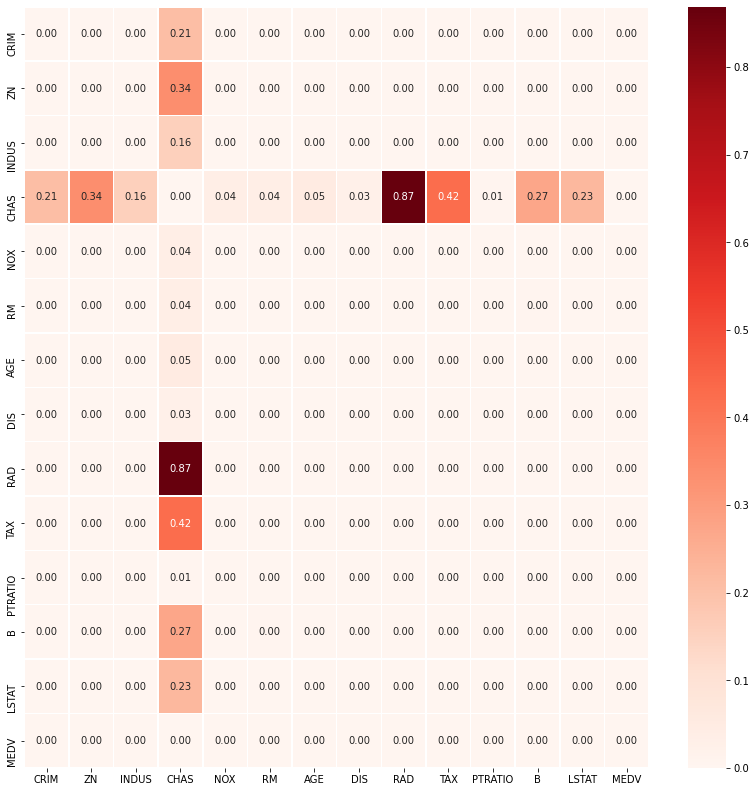

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(corr_p_values, annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')

In [ ]:
BostonHousing_data_0=pd.DataFrame(BostonHousingData.iloc[:,0:14], columns=flist)


In [ ]:
del BostonHousing_data_0['MEDV']

In [ ]:
# 바이어스 추가
BostonHousing_data = sm.add_constant(BostonHousing_data_0)

In [ ]:
BostonHousing_data

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
BostonHousing_target=pd.DataFrame(BostonHousingData['MEDV'], columns=['MEDV'])

In [ ]:
model_Boston = sm.OLS(BostonHousing_target, BostonHousing_data)
result_Boston = model_Boston.fit()
result_Boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 01 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        05:29:27   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

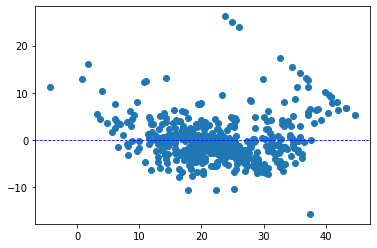

In [ ]:
pred = result_Boston.predict(BostonHousing_data)
resid = result_Boston.resid
plt.scatter(pred, resid)
plt.axhline(y=0, color='b', linewidth=0.8, linestyle='--')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


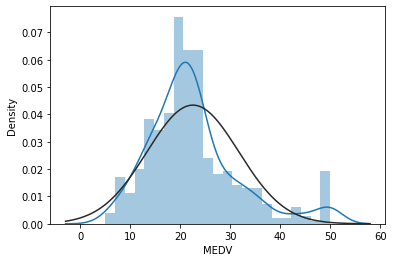

In [ ]:
sns.distplot(BostonHousingData['MEDV'], fit=stats.norm)
plt.show()

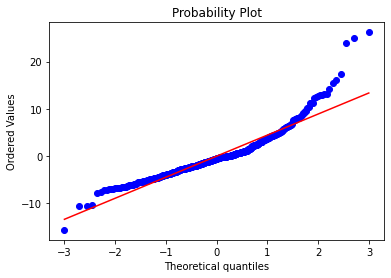

In [ ]:
stats.probplot(resid, plot=plt)
plt.show()